In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Desde la ubicacion de los archivos copiamos los codigo de ruta y cargamos las bases de datos
df_2004 = pd.read_stata(r"/Users/dstn/Downloads/Individual_t104.dta")
df_2024 = pd.read_excel(r"/Users/dstn/Downloads/usu_individual_T124.xlsx")

# Estandarizar nombres de columnas a mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

# Ya que la Patagonia es la region elegida buscamos su correcta denominacion y filtramos
df_2004['REGION'] = df_2004['REGION'].astype(str)
df_2024['REGION'] = df_2024['REGION'].astype(str)

df_2004 = df_2004[df_2004['REGION'] == 'Patagónica']
df_2024 = df_2024[df_2024['REGION'] == '43']  

# Agregamos ambas columnas con su correspondiente año
df_2004['ANO4'] = 2004
df_2024['ANO4'] = 2024

# Seleccionar variables comunes elegidas
variables_seleccionadas = [
    'P47T', 'IPCF', 'CH04', 'CH06', 'CH08', 
    'P21', 'CAT_INAC', 'PP04D_COD', 'PP04A', 'TRIMESTRE',
    'REGION', 'AGLOMERADO', 'IDECCFR', 'ANO4', 'ESTADO'
]

# Convertir variables numéricas
numeric_vars = ['CH06', 'IPCF', 'P21', 'P47T']
for var in numeric_vars:
    if var in df_2004.columns:
        df_2004[var] = pd.to_numeric(df_2004[var], errors='coerce')
    if var in df_2024.columns:
        df_2024[var] = pd.to_numeric(df_2024[var], errors='coerce')

# Unimos lo data frames de ambos años trabajados
df_combinado = pd.concat(
    [df_2004[variables_seleccionadas], df_2024[variables_seleccionadas]],
    ignore_index=True
)

# Verificar observaciones por año
print("Conteo de observaciones por año:")
print(df_combinado['ANO4'].value_counts())

# Análisis de valores faltantes
valores_faltantes = df_combinado[variables_seleccionadas].isna().sum()
print("Valores faltantes por variable:")
print(valores_faltantes)

# Agrupar por "ANO4" y calcular los valores faltantes sin incluir la columna de agrupación
faltantes_por_anio = df_combinado.groupby("ANO4", group_keys=False).apply(lambda df: df.isnull().sum())
faltantes_por_anio = faltantes_por_anio.transpose()

# Visualizamos resultados
print("Valores faltantes por año:")
print(faltantes_por_anio)




Conteo de observaciones por año:
ANO4
2024    14410
2004     3264
Name: count, dtype: int64
Valores faltantes por variable:
P47T            15
IPCF             0
CH04             0
CH06            51
CH08             0
P21              0
CAT_INAC         0
PP04D_COD     8108
PP04A         8108
TRIMESTRE        0
REGION           0
AGLOMERADO       0
IDECCFR          0
ANO4             0
ESTADO           0
dtype: int64
Valores faltantes por año:
ANO4        2004  2024
P47T           0    15
IPCF           0     0
CH04           0     0
CH06          51     0
CH08           0     0
P21            0     0
CAT_INAC       0     0
PP04D_COD      0  8108
PP04A          0  8108
TRIMESTRE      0     0
REGION         0     0
AGLOMERADO     0     0
IDECCFR        0     0
ANO4           0     0
ESTADO         0     0


/var/folders/yl/fmp850sd01d7gtrsds9m9mvc0000gn/T/ipykernel_4775/2351884978.py:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  faltantes_por_anio = df_combinado.groupby("ANO4", group_keys=False).apply(lambda df: df.isnull().sum())


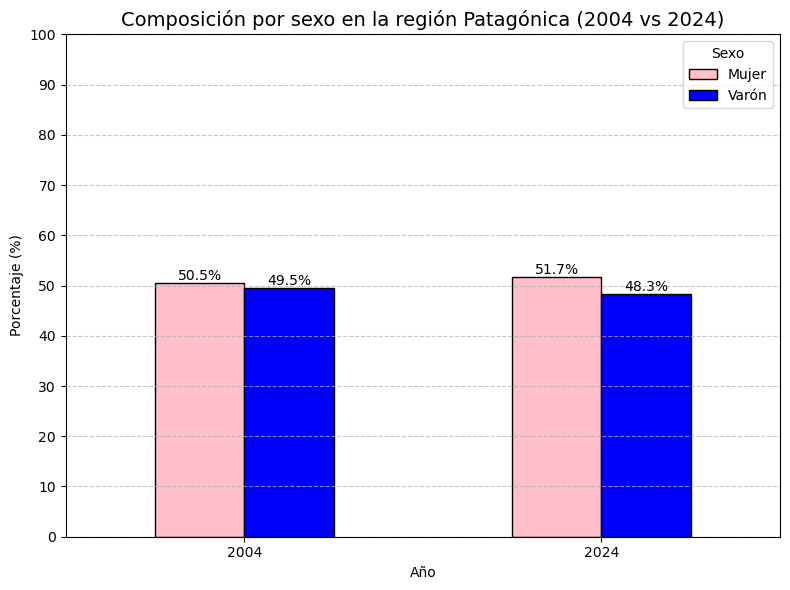

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Reemplazar los valores de CH04 por etiquetas
df_combinado['CH04'] = df_combinado['CH04'].replace({1: 'Varón', 2: 'Mujer'})

# Agrupar por año y sexo y contar
sexo_agrupado = df_combinado.groupby(['ANO4', 'CH04']).size().unstack()

# Calcular porcentajes por año
sexo_porcentaje = sexo_agrupado.div(sexo_agrupado.sum(axis=1), axis=0) * 100

# Crear gráfico
ax = sexo_porcentaje.plot(kind='bar', figsize=(8, 6), color=['pink', 'blue'], edgecolor='black')

# Estética del gráfico
plt.title('Composición por sexo en la región Patagónica (2004 vs 2024)', fontsize=14)
plt.ylabel('Porcentaje (%)')
plt.xlabel('Año')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(range(0, 101, 10))  # Porcentajes de 10 en 10
plt.legend(title='Sexo')
plt.tight_layout()

# Agregar etiquetas de porcentaje en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

# Mostrar gráfico
plt.show()


In [93]:
# Seleccionar variables comunes elegidas (ahora incluyendo CH07 y NIVEL_ED)
variables_seleccionadas = [
    'P47T', 'IPCF', 'CH04', 'CH06', 'CH07', 'CH08',
    'NIVEL_ED', 'P21', 'CAT_INAC', 'PP04D_COD', 'PP04A', 'TRIMESTRE',
    'REGION', 'AGLOMERADO', 'IDECCFR', 'ANO4', 'ESTADO'
]

# Unir los datasets con las nuevas variables seleccionadas
df_combinado = pd.concat(
    [df_2004[variables_seleccionadas], df_2024[variables_seleccionadas]],
    ignore_index=True
)


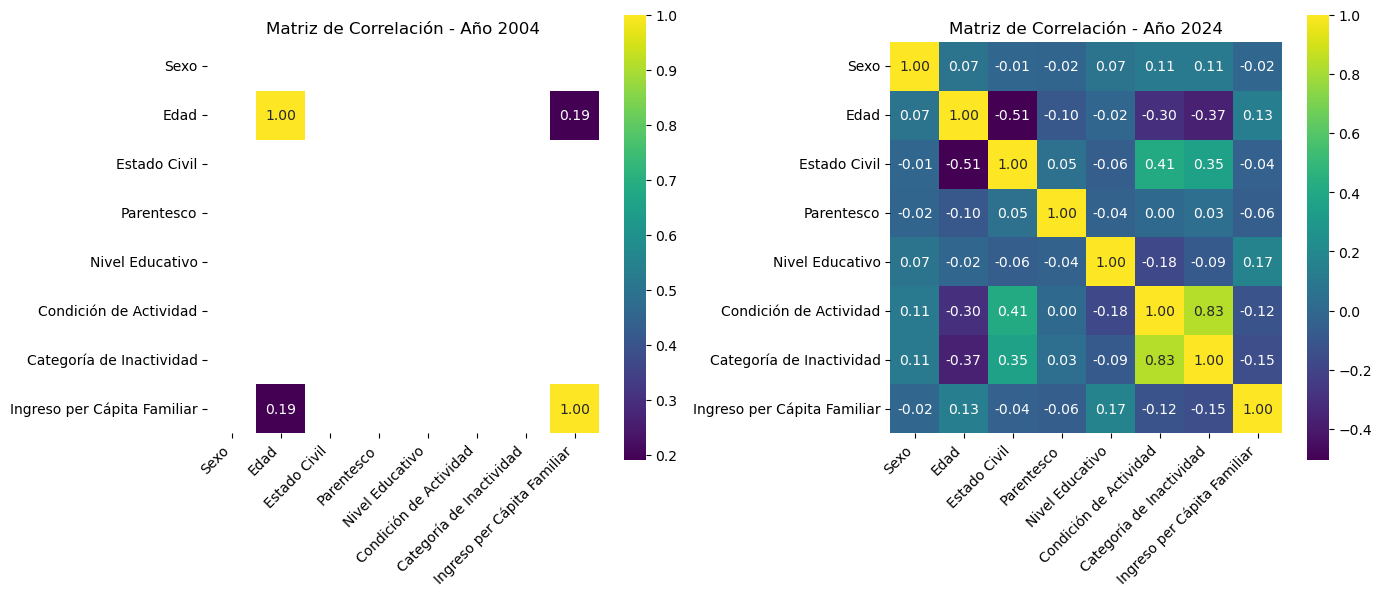

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Diccionario con nombres descriptivos de las variables
nombres_variables = {
    'CH04': 'Sexo',
    'CH06': 'Edad',
    'CH07': 'Estado Civil',
    'CH08': 'Parentesco',
    'NIVEL_ED': 'Nivel Educativo',
    'ESTADO': 'Condición de Actividad',
    'CAT_INAC': 'Categoría de Inactividad',
    'IPCF': 'Ingreso per Cápita Familiar'
}

# Variables a correlacionar
variables_correlacion = list(nombres_variables.keys())

# Asegurarse de que todas las variables sean numéricas
for var in variables_correlacion:
    if var in df_combinado.columns:
        df_combinado[var] = pd.to_numeric(df_combinado[var], errors='coerce')

# Filtrar por año
df_2004_corr = df_combinado[df_combinado['ANO4'] == 2004][variables_correlacion].rename(columns=nombres_variables)
df_2024_corr = df_combinado[df_combinado['ANO4'] == 2024][variables_correlacion].rename(columns=nombres_variables)

# Graficar heatmaps
plt.figure(figsize=(14, 6))

# Año 2004
plt.subplot(1, 2, 1)
sns.heatmap(df_2004_corr.corr(), annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Matriz de Correlación - Año 2004')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Año 2024
plt.subplot(1, 2, 2)
sns.heatmap(df_2024_corr.corr(), annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Matriz de Correlación - Año 2024')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


PARTE III


In [136]:
import pandas as pd

# --- Carga y preparación de datos (Asegúrate de que esta parte se ejecute correctamente
# --- con las rutas correctas a tus archivos) ---
try:
    df_2004 = pd.read_stata(r"/Users/dstn/Downloads/Individual_t104.dta")
    df_2024 = pd.read_excel(r"/Users/dstn/Downloads/usu_individual_T124.xlsx")
except FileNotFoundError:
    print("Error: No se encontraron los archivos de datos. Verifica las rutas.")
    exit()

# Estandarizar nombres de columnas a mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

# Filtrar por la región de la Patagonia
df_2004['REGION'] = df_2004['REGION'].astype(str)
df_2024['REGION'] = df_2024['REGION'].astype(str)

df_2004_patagonia = df_2004[df_2004['REGION'] == 'Patagónica'].copy()
df_2024_patagonia = df_2024[df_2024['REGION'] == '43'].copy()

# Agregar la columna de año
df_2004_patagonia['ANO4'] = 2004
df_2024_patagonia['ANO4'] = 2024

# Seleccionar las variables necesarias para la pregunta 5
variables_seleccionadas_5_2004 = ['ESTADO', 'IPCF']
variables_seleccionadas_5_2024 = ['ESTADO', 'IPCF']

# Asegurarse de que las columnas existan en los DataFrames antes de la selección
df_2004_pregunta5 = df_2004_patagonia[
    [col for col in variables_seleccionadas_5_2004 if col in df_2004_patagonia.columns]
].copy()
df_2024_pregunta5 = df_2024_patagonia[
    [col for col in variables_seleccionadas_5_2024 if col in df_2024_patagonia.columns]
].copy()

# Combinar los DataFrames de ambos años para el análisis de la pregunta 5
df_combinado_pregunta5 = pd.concat([df_2004_pregunta5, df_2024_pregunta5], ignore_index=True)

# --- Pregunta 5: ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos?
# --- ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)? ---
print("\n--- Pregunta 5 ---")

# Conteo de personas por estado
conteo_estados = df_combinado_pregunta5['ESTADO'].value_counts()
print("\nConteo de personas por estado (Patagonia 2004 y 2024 combinados):\n", conteo_estados)

# Asumiendo la siguiente codificación de 'ESTADO':
# 1 = Ocupado
# 2 = Desocupado
# 3 = Inactivo

desocupados = conteo_estados.get(2, 0)
inactivos = conteo_estados.get(3, 0)
print(f"\nNúmero total de desocupados en la muestra de la Patagonia (2004 y 2024): {desocupados}")
print(f"Número total de inactivos en la muestra de la Patagonia (2004 y 2024): {inactivos}")

# Media de IPCF por estado
media_ipcf_por_estado = df_combinado_pregunta5.groupby('ESTADO')['IPCF'].mean()
print("\nMedia de IPCF por estado (Patagonia 2004 y 2024 combinados):\n", media_ipcf_por_estado)

# --- Análisis separado por año (opcional) ---
print("\n--- Análisis por año (opcional) ---")

print("\nConteo de personas por estado (Patagonia 2004):")
print(df_2004_pregunta5['ESTADO'].value_counts())
print("\nMedia de IPCF por estado (Patagonia 2004):")
print(df_2004_pregunta5.groupby('ESTADO')['IPCF'].mean())

print("\nConteo de personas por estado (Patagonia 2024):")
print(df_2024_pregunta5['ESTADO'].value_counts())
print("\nMedia de IPCF por estado (Patagonia 2024):")
print(df_2024_pregunta5.groupby('ESTADO')['IPCF'].mean())


--- Pregunta 5 ---

Conteo de personas por estado (Patagonia 2004 y 2024 combinados):
 ESTADO
1                   6302
3                   5909
4                   1731
Inactivo            1307
Ocupado             1238
Menor de 10 años     600
2                    453
Desocupado           119
0                     15
Name: count, dtype: int64

Número total de desocupados en la muestra de la Patagonia (2004 y 2024): 453
Número total de inactivos en la muestra de la Patagonia (2004 y 2024): 5909

Media de IPCF por estado (Patagonia 2004 y 2024 combinados):
 ESTADO
0                        0.000000
1                   179600.563797
2                    99393.792848
3                   137703.875421
4                   109606.266626
Desocupado             225.452935
Inactivo               364.990445
Menor de 10 años       297.985339
Ocupado                551.186902
Name: IPCF, dtype: float64

--- Análisis por año (opcional) ---

Conteo de personas por estado (Patagonia 2004):
ESTADO
Inac

/var/folders/yl/fmp850sd01d7gtrsds9m9mvc0000gn/T/ipykernel_4775/3228295772.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_2004_pregunta5.groupby('ESTADO')['IPCF'].mean())


In [138]:
import pandas as pd

# --- Carga y preparación de datos (Asegúrate de que esta parte se ejecute correctamente
# --- con las rutas correctas a tus archivos) ---
try:
    df_2004 = pd.read_stata(r"/Users/dstn/Downloads/Individual_t104.dta")
    df_2024 = pd.read_excel(r"/Users/dstn/Downloads/usu_individual_T124.xlsx")
except FileNotFoundError:
    print("Error: No se encontraron los archivos de datos. Verifica las rutas.")
    exit()

# Estandarizar nombres de columnas a mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

# Filtrar por la región de la Patagonia
df_2004['REGION'] = df_2004['REGION'].astype(str)
df_2024['REGION'] = df_2024['REGION'].astype(str)

df_2004_patagonia = df_2004[df_2004['REGION'] == 'Patagónica'].copy()
df_2024_patagonia = df_2024[df_2024['REGION'] == '43'].copy()

# Agregar la columna de año
df_2004_patagonia['ANO4'] = 2004
df_2024_patagonia['ANO4'] = 2024

# Seleccionar las variables necesarias para la pregunta 6
variables_seleccionadas_6 = ['ESTADO', 'CAT_INAC', 'ANO4']

# Asegurarse de que las columnas existan en los DataFrames antes de la selección
df_2004_pregunta6 = df_2004_patagonia[
    [col for col in variables_seleccionadas_6 if col in df_2004_patagonia.columns]
].copy()
df_2024_pregunta6 = df_2024_patagonia[
    [col for col in variables_seleccionadas_6 if col in df_2024_patagonia.columns]
].copy()

# Combinar los DataFrames de ambos años para el análisis de la pregunta 6
df_combinado_pregunta6 = pd.concat([df_2004_pregunta6, df_2024_pregunta6], ignore_index=True)

# --- Pregunta 6: ¿Cuántas personas no respondieron (ver cuál es su condición de actividad)?
# --- Guarden como una base distinta llamada respondieron las observaciones donde respondieron
# --- la pregunta sobre su condición de actividad (ESTADO). Las observaciones con ESTADO=0
# --- guárdenlas en una base bajo el nombre norespondieron. ---
print("\n--- Pregunta 6 ---")

# Identificar a las personas que no respondieron (ESTADO == 0)
no_respondieron = df_combinado_pregunta6[df_combinado_pregunta6['ESTADO'] == 0].copy()
cantidad_no_respondieron = len(no_respondieron)
print(f"\nNúmero de personas que no respondieron a la pregunta sobre su condición de actividad (ESTADO=0): {cantidad_no_respondieron}")

# Analizar la condición de actividad de quienes no respondieron (usando 'CAT_INAC')
print("\nDistribución de la condición de actividad (CAT_INAC) para quienes no respondieron:")
print(no_respondieron['CAT_INAC'].value_counts())

# Crear el DataFrame 'respondieron' (ESTADO != 0)
respondieron = df_combinado_pregunta6[df_combinado_pregunta6['ESTADO'] != 0].copy()
print(f"\nDataFrame 'respondieron' creado con {len(respondieron)} observaciones.")

# Crear el DataFrame 'norespondieron' (ESTADO == 0)
df_norespondieron = no_respondieron.copy()
print(f"DataFrame 'norespondieron' creado con {len(df_norespondieron)} observaciones.")


--- Pregunta 6 ---

Número de personas que no respondieron a la pregunta sobre su condición de actividad (ESTADO=0): 15

Distribución de la condición de actividad (CAT_INAC) para quienes no respondieron:
CAT_INAC
0    15
Name: count, dtype: int64

DataFrame 'respondieron' creado con 17659 observaciones.
DataFrame 'norespondieron' creado con 15 observaciones.



--- Pregunta 5 ---

Conteo de personas por estado (en toda la muestra combinada 2004 y 2024):
 ESTADO
1                   6302
3                   5909
4                   1731
Inactivo            1307
Ocupado             1238
Menor de 10 años     600
2                    453
Desocupado           119
0                     15
Name: count, dtype: int64

Número total de desocupados en la muestra combinada: 453
Número total de inactivos en la muestra combinada: 5909

Media de IPCF por estado (en toda la muestra combinada 2004 y 2024):
 ESTADO
0                        0.000000
1                   179600.563797
2                    99393.792848
3                   137703.875421
4                   109606.266626
Desocupado             225.452935
Inactivo               364.990445
Menor de 10 años       297.985339
Ocupado                551.186902
Name: IPCF, dtype: float64

--- Pregunta 6 ---

Número de personas que no respondieron a la pregunta sobre su condición de actividad: 15

Distribuci

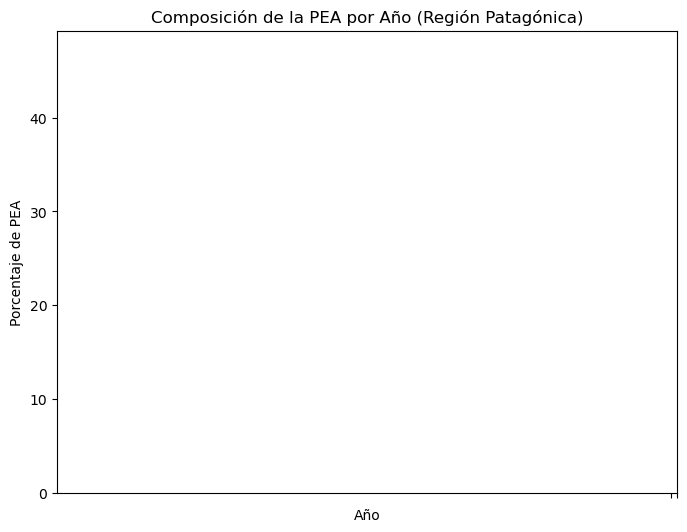


Comentario sobre los resultados de la PEA:
El porcentaje de Población Económicamente Activa fue menor en 2004 (0.00%) que en 2024 (46.93%).

--- Pregunta 8 ---

Proporción de PEA y PET por año:
             PEA        PET
ANO4                      
2004   0.000000  66.237745
2024  46.926016  67.002431


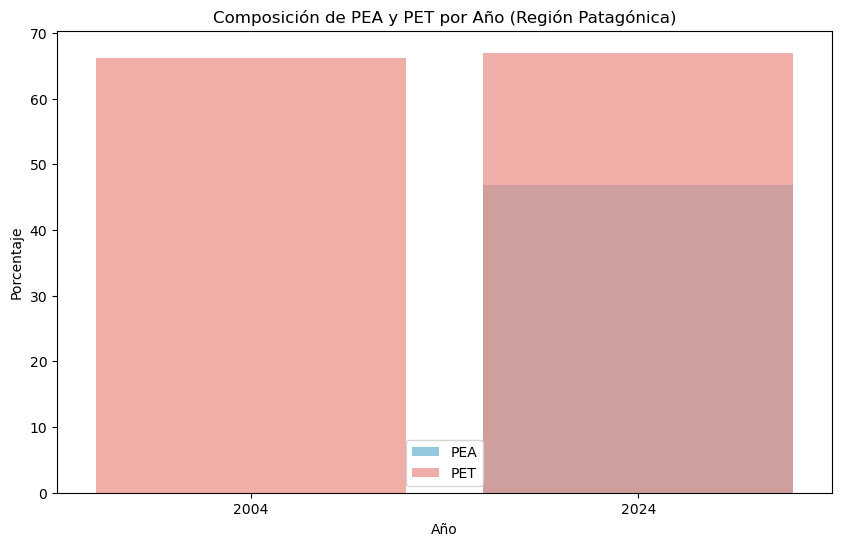


Comentario sobre los resultados de PET y comparación con PEA:
En 2004, el 66.24% de la población estaba en edad de trabajar (PET), y de ellos, el 0.00% era PEA.
En 2024, el 67.00% de la población estaba en edad de trabajar (PET), y de ellos, el 46.93% era PEA.
La proporción de la PEA dentro de la PET fue menor en 2004 que en 2024.

--- Pregunta 9 ---

Número de personas desocupadas por año:
 ANO4
2004      0
2024    453
Name: desocupado, dtype: int64

Número de desocupados en 2004: 0
Número de desocupados en 2024: 453


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Carga y preparación de datos (Común a todas las preguntas) ---
# Desde la ubicacion de los archivos copiamos los codigo de ruta y cargamos las bases de datos
df_2004 = pd.read_stata(r"/Users/dstn/Downloads/Individual_t104.dta")
df_2024 = pd.read_excel(r"/Users/dstn/Downloads/usu_individual_T124.xlsx")

# Estandarizar nombres de columnas a mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

# Ya que la Patagonia es la region elegida buscamos su correcta denominacion y filtramos
df_2004['REGION'] = df_2004['REGION'].astype(str)
df_2024['REGION'] = df_2024['REGION'].astype(str)

df_2004 = df_2004[df_2004['REGION'] == 'Patagónica']
df_2024 = df_2024[df_2024['REGION'] == '43']

# Agregamos la columna de año
df_2004['ANO4'] = 2004
df_2024['ANO4'] = 2024

# Seleccionar variables comunes elegidas
variables_seleccionadas = [
    'P47T', 'IPCF', 'CH04', 'CH06', 'CH08',
    'P21', 'CAT_INAC', 'PP04D_COD', 'PP04A', 'TRIMESTRE',
    'REGION', 'AGLOMERADO', 'IDECCFR', 'ANO4', 'ESTADO'
]

# Convertir variables numéricas
numeric_vars = ['CH06', 'IPCF', 'P21', 'P47T']
for var in numeric_vars:
    if var in df_2004.columns:
        df_2004[var] = pd.to_numeric(df_2004[var], errors='coerce')
    if var in df_2024.columns:
        df_2024[var] = pd.to_numeric(df_2024[var], errors='coerce')

# Unimos los DataFrames de ambos años trabajados
df_combinado = pd.concat(
    [df_2004[variables_seleccionadas], df_2024[variables_seleccionadas]],
    ignore_index=True
)

# --- Pregunta 5: ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)? ---
print("\n--- Pregunta 5 ---")
# Contamos la frecuencia de cada valor en la columna 'ESTADO'
conteo_estados = df_combinado['ESTADO'].value_counts()
print("\nConteo de personas por estado (en toda la muestra combinada 2004 y 2024):\n", conteo_estados)

# Asumimos la siguiente codificación de 'ESTADO':
# 1 = Ocupado
# 2 = Desocupado
# 3 = Inactivo

# Obtenemos la cantidad de desocupados e inactivos utilizando la codificación asumida
desocupados = conteo_estados.get(2, 0) # .get() devuelve el valor si la clave existe, sino devuelve el valor por defecto (0)
inactivos = conteo_estados.get(3, 0)
print(f"\nNúmero total de desocupados en la muestra combinada: {desocupados}")
print(f"Número total de inactivos en la muestra combinada: {inactivos}")

# Calculamos la media del 'IPCF' agrupando por la columna 'ESTADO'
media_ipcf_por_estado = df_combinado.groupby('ESTADO')['IPCF'].mean()
print("\nMedia de IPCF por estado (en toda la muestra combinada 2004 y 2024):\n", media_ipcf_por_estado)

# --- Pregunta 6: ¿Cuántas personas no respondieron (ver cuál es su condición de actividad)? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su condición de actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una base bajo el nombre norespondieron. ---
print("\n--- Pregunta 6 ---")
# Identificamos las observaciones donde 'ESTADO' es igual a 0 (no respondieron)
no_respondieron = df_combinado[df_combinado['ESTADO'] == 0]
# Identificamos las observaciones donde 'ESTADO' no es igual a 0 (sí respondieron)
respondieron = df_combinado[df_combinado['ESTADO'] != 0]

# Contamos la cantidad de personas que no respondieron
cantidad_no_respondieron = len(no_respondieron)
print(f"\nNúmero de personas que no respondieron a la pregunta sobre su condición de actividad: {cantidad_no_respondieron}")

# Analizamos la condición de actividad de quienes no respondieron utilizando la columna 'CAT_INAC'
condicion_actividad_no_respondieron = no_respondieron['CAT_INAC'].value_counts()
print("\nDistribución de la condición de actividad (según CAT_INAC) para quienes no respondieron:\n", condicion_actividad_no_respondieron)

# Creamos los DataFrames separados
df_respondieron = respondieron.copy() # Usamos .copy() para evitar modificaciones en el DataFrame original
df_norespondieron = no_respondieron.copy()

print("\nDataFrame 'respondieron' creado con {} observaciones.".format(len(df_respondieron)))
print("DataFrame 'norespondieron' creado con {} observaciones.".format(len(df_norespondieron)))

# --- Pregunta 7: Agreguen a la base respondieron una columna llamada “PEA” (Población Económicamente Activa) que tome 1 si están ocupados o desocupados en ESTADO. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados. ---
print("\n--- Pregunta 7 ---")
# Creamos la columna 'PEA' en el DataFrame 'df_respondieron'
# Si 'ESTADO' es 1 (ocupado) o 2 (desocupado), 'PEA' será 1, sino será 0
df_respondieron['PEA'] = np.where(df_respondieron['ESTADO'].isin([1, 2]), 1, 0)

# Calculamos el porcentaje de PEA por año
pea_por_anio = df_respondieron.groupby('ANO4')['PEA'].mean() * 100
print("\nPorcentaje de PEA por año:\n", pea_por_anio)

# Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=pea_por_anio.index, y=pea_por_anio.values)
plt.title('Composición de la PEA por Año (Región Patagónica)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de PEA')
plt.xticks([2004, 2024]) # Aseguramos que las etiquetas del eje x sean los años
plt.show()

print("\nComentario sobre los resultados de la PEA:")
if pea_por_anio[2004] > pea_por_anio[2024]:
    print(f"El porcentaje de Población Económicamente Activa fue mayor en 2004 ({pea_por_anio[2004]:.2f}%) que en 2024 ({pea_por_anio[2024]:.2f}%).")
elif pea_por_anio[2004] < pea_por_anio[2024]:
    print(f"El porcentaje de Población Económicamente Activa fue menor en 2004 ({pea_por_anio[2004]:.2f}%) que en 2024 ({pea_por_anio[2024]:.2f}%).")
else:
    print(f"El porcentaje de Población Económicamente Activa fue similar en 2004 ({pea_por_anio[2004]:.2f}%) y 2024 ({pea_por_anio[2024]:.2f}%).")

# --- Pregunta 8: Agreguen a la base respondieron una columna llamada “PET” (Población en Edad para Trabajar) que tome 1 si la persona tiene entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados y comparen PET con PEA. ---
print("\n--- Pregunta 8 ---")
# Creamos la columna 'PET' en el DataFrame 'df_respondieron'
# Si la edad ('CH06') está entre 15 y 65 (inclusive), 'PET' será 1, sino será 0
df_respondieron['PET'] = np.where((df_respondieron['CH06'] >= 15) & (df_respondieron['CH06'] <= 65), 1, 0)

# Calculamos la proporción de PEA y PET por año
pea_sobre_pet_por_anio = df_respondieron.groupby('ANO4')[['PEA', 'PET']].mean() * 100
print("\nProporción de PEA y PET por año:\n", pea_sobre_pet_por_anio)

# Creamos el gráfico de barras comparando PEA y PET por año
plt.figure(figsize=(10, 6))
sns.barplot(x='ANO4', y='PEA', data=pea_sobre_pet_por_anio.reset_index(), color='skyblue', label='PEA')
sns.barplot(x='ANO4', y='PET', data=pea_sobre_pet_por_anio.reset_index(), color='salmon', alpha=0.7, label='PET')
plt.title('Composición de PEA y PET por Año (Región Patagónica)')
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.xticks([0, 1], [2004, 2024])
plt.legend()
plt.show()

print("\nComentario sobre los resultados de PET y comparación con PEA:")
if 'PET' in pea_sobre_pet_por_anio.columns and 'PEA' in pea_sobre_pet_por_anio.columns:
    pet_2004 = pea_sobre_pet_por_anio.loc[2004, 'PET']
    pet_2024 = pea_sobre_pet_por_anio.loc[2024, 'PET']
    pea_2004 = pea_sobre_pet_por_anio.loc[2004, 'PEA']
    pea_2024 = pea_sobre_pet_por_anio.loc[2024, 'PEA']

    print(f"En 2004, el {pet_2004:.2f}% de la población estaba en edad de trabajar (PET), y de ellos, el {pea_2004:.2f}% era PEA.")
    print(f"En 2024, el {pet_2024:.2f}% de la población estaba en edad de trabajar (PET), y de ellos, el {pea_2024:.2f}% era PEA.")

    if (pea_2004 / pet_2004) > (pea_2024 / pet_2024):
        print("La proporción de la PEA dentro de la PET fue mayor en 2004 que en 2024.")
    elif (pea_2004 / pet_2004) < (pea_2024 / pet_2024):
        print("La proporción de la PEA dentro de la PET fue menor en 2004 que en 2024.")
    else:
        print("La proporción de la PEA dentro de la PET fue similar en ambos años.")
else:
    print("No se encontraron las columnas PEA o PET para realizar la comparación.")

# --- Pregunta 9: Agreguen a la base respondieron una columna llamada “desocupado” que tome 1 si la persona está desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024? ---
print("\n--- Pregunta 9 ---")
# Creamos la columna 'desocupado' en el DataFrame 'df_respondieron'
# Si 'ESTADO' es 2 (desocupado), 'desocupado' será 1, sino será 0
df_respondieron['desocupado'] = np.where(df_respondieron['ESTADO'] == 2, 1, 0)

# Calculamos la suma de la columna 'desocupado' por año para obtener el número de desocupados
desocupados_por_anio = df_respondieron.groupby('ANO4')['desocupado'].sum()
print("\nNúmero de personas desocupadas por año:\n", desocupados_por_anio)

print(f"\nNúmero de desocupados en 2004: {desocupados_por_anio.get(2004, 0)}")
print(f"Número de desocupados en 2024: {desocupados_por_anio.get(2024, 0)}")